In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [4]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

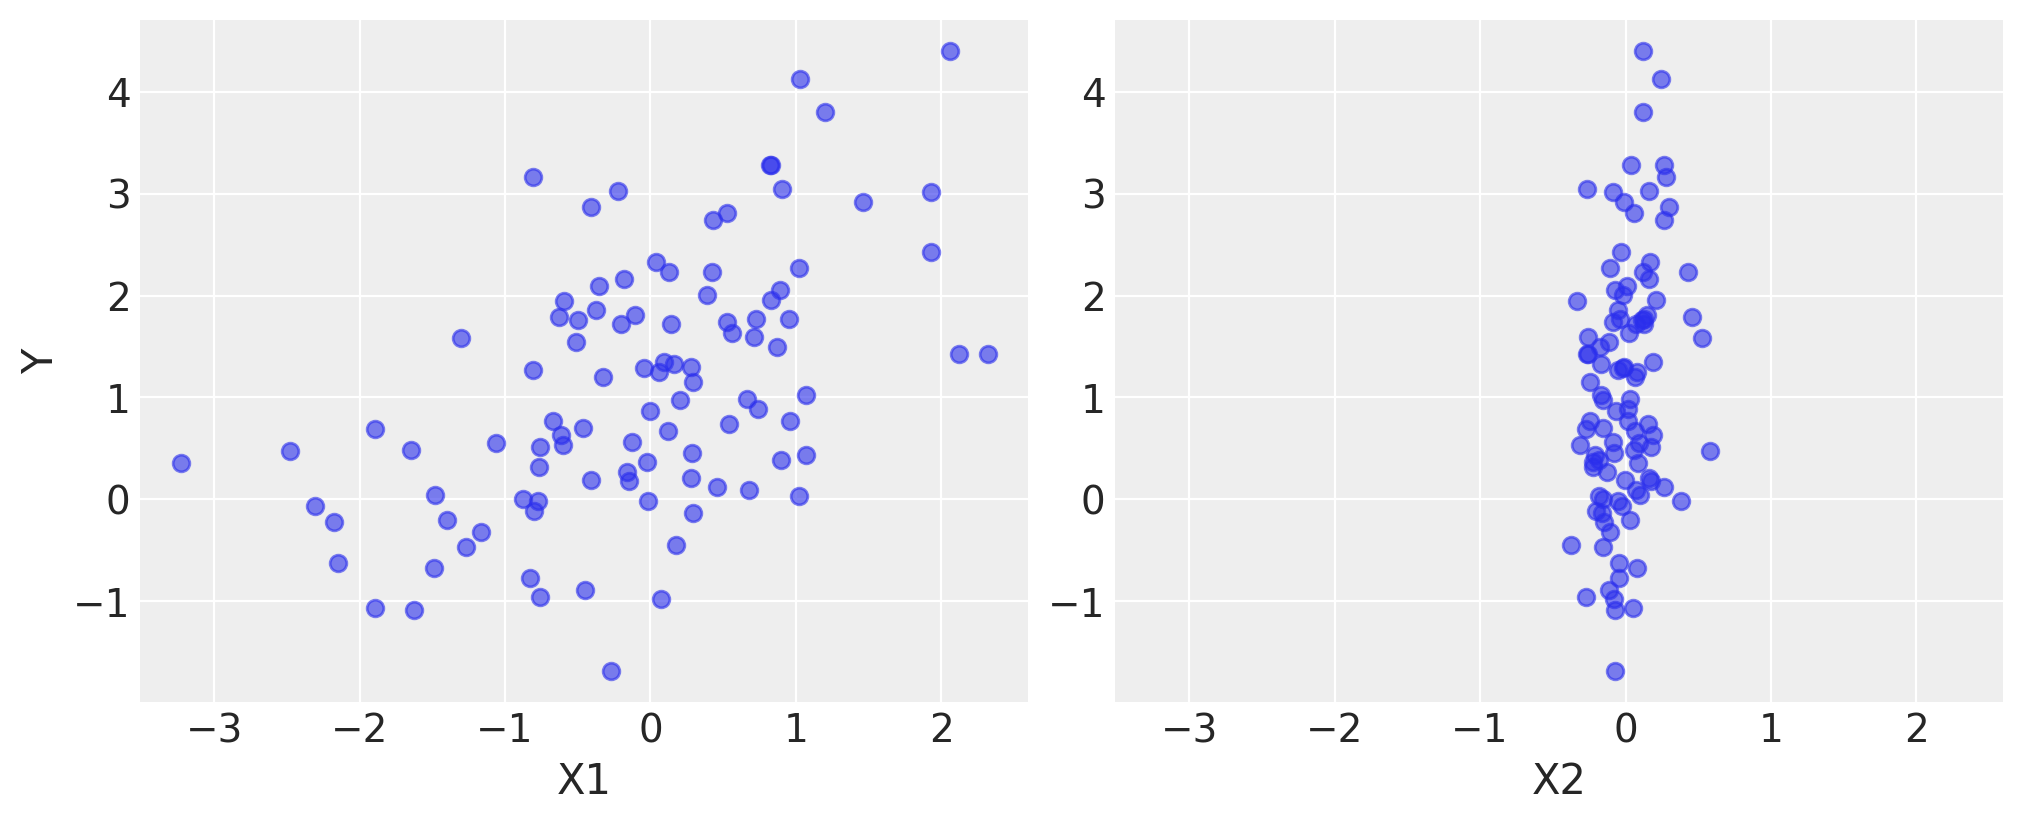

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [6]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.22.0


In [8]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

Text(0.5, 0, 'alpha')

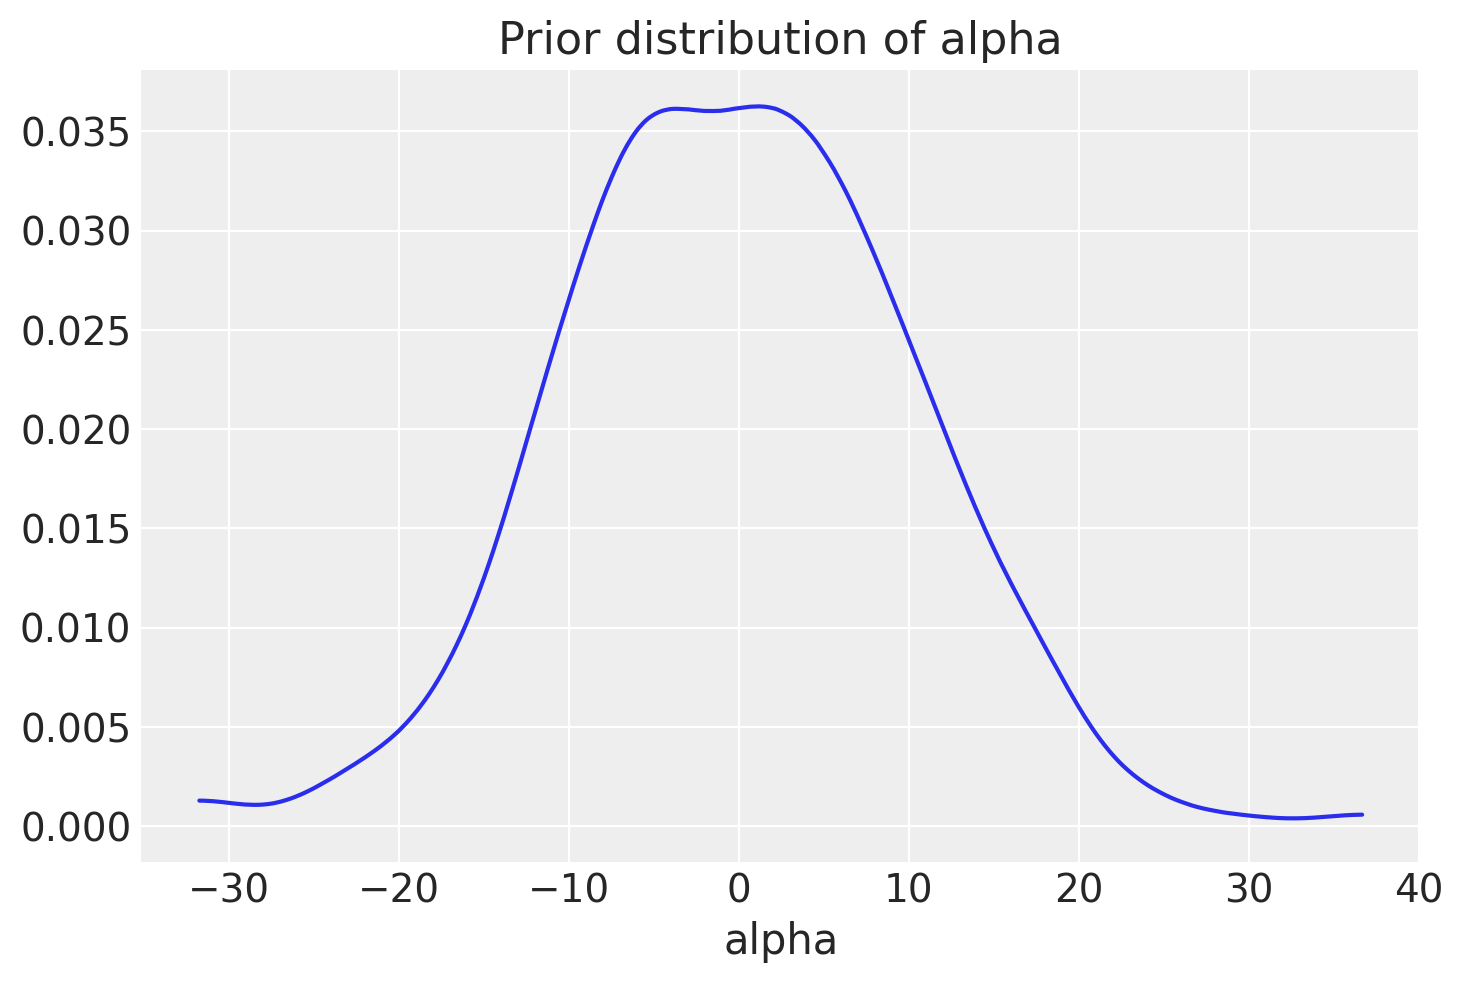

In [11]:
az.plot_dist(pm.draw(alpha, draws=1000, random_seed=RANDOM_SEED))
plt.title("Prior distribution of alpha")
plt.xlabel("alpha")


In [12]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/Users/administrator/miniforge3/envs/mgme_task/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [16]:
idata.posterior["alpha"].sel(draw=slice(0, 4))


<xarray.DataArray 'alpha' (chain: 4, draw: 5)> Size: 160B
array([[1.34016193, 1.22823696, 1.19286597, 1.01293192, 1.16196871],
       [1.32643135, 1.1042471 , 1.14139063, 1.11318722, 0.98039652],
       [1.04285027, 1.11762025, 1.10034285, 1.18145498, 1.05201016],
       [1.00739778, 1.16587316, 1.21407225, 1.10114157, 1.11765976]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 40B 0 1 2 3 4

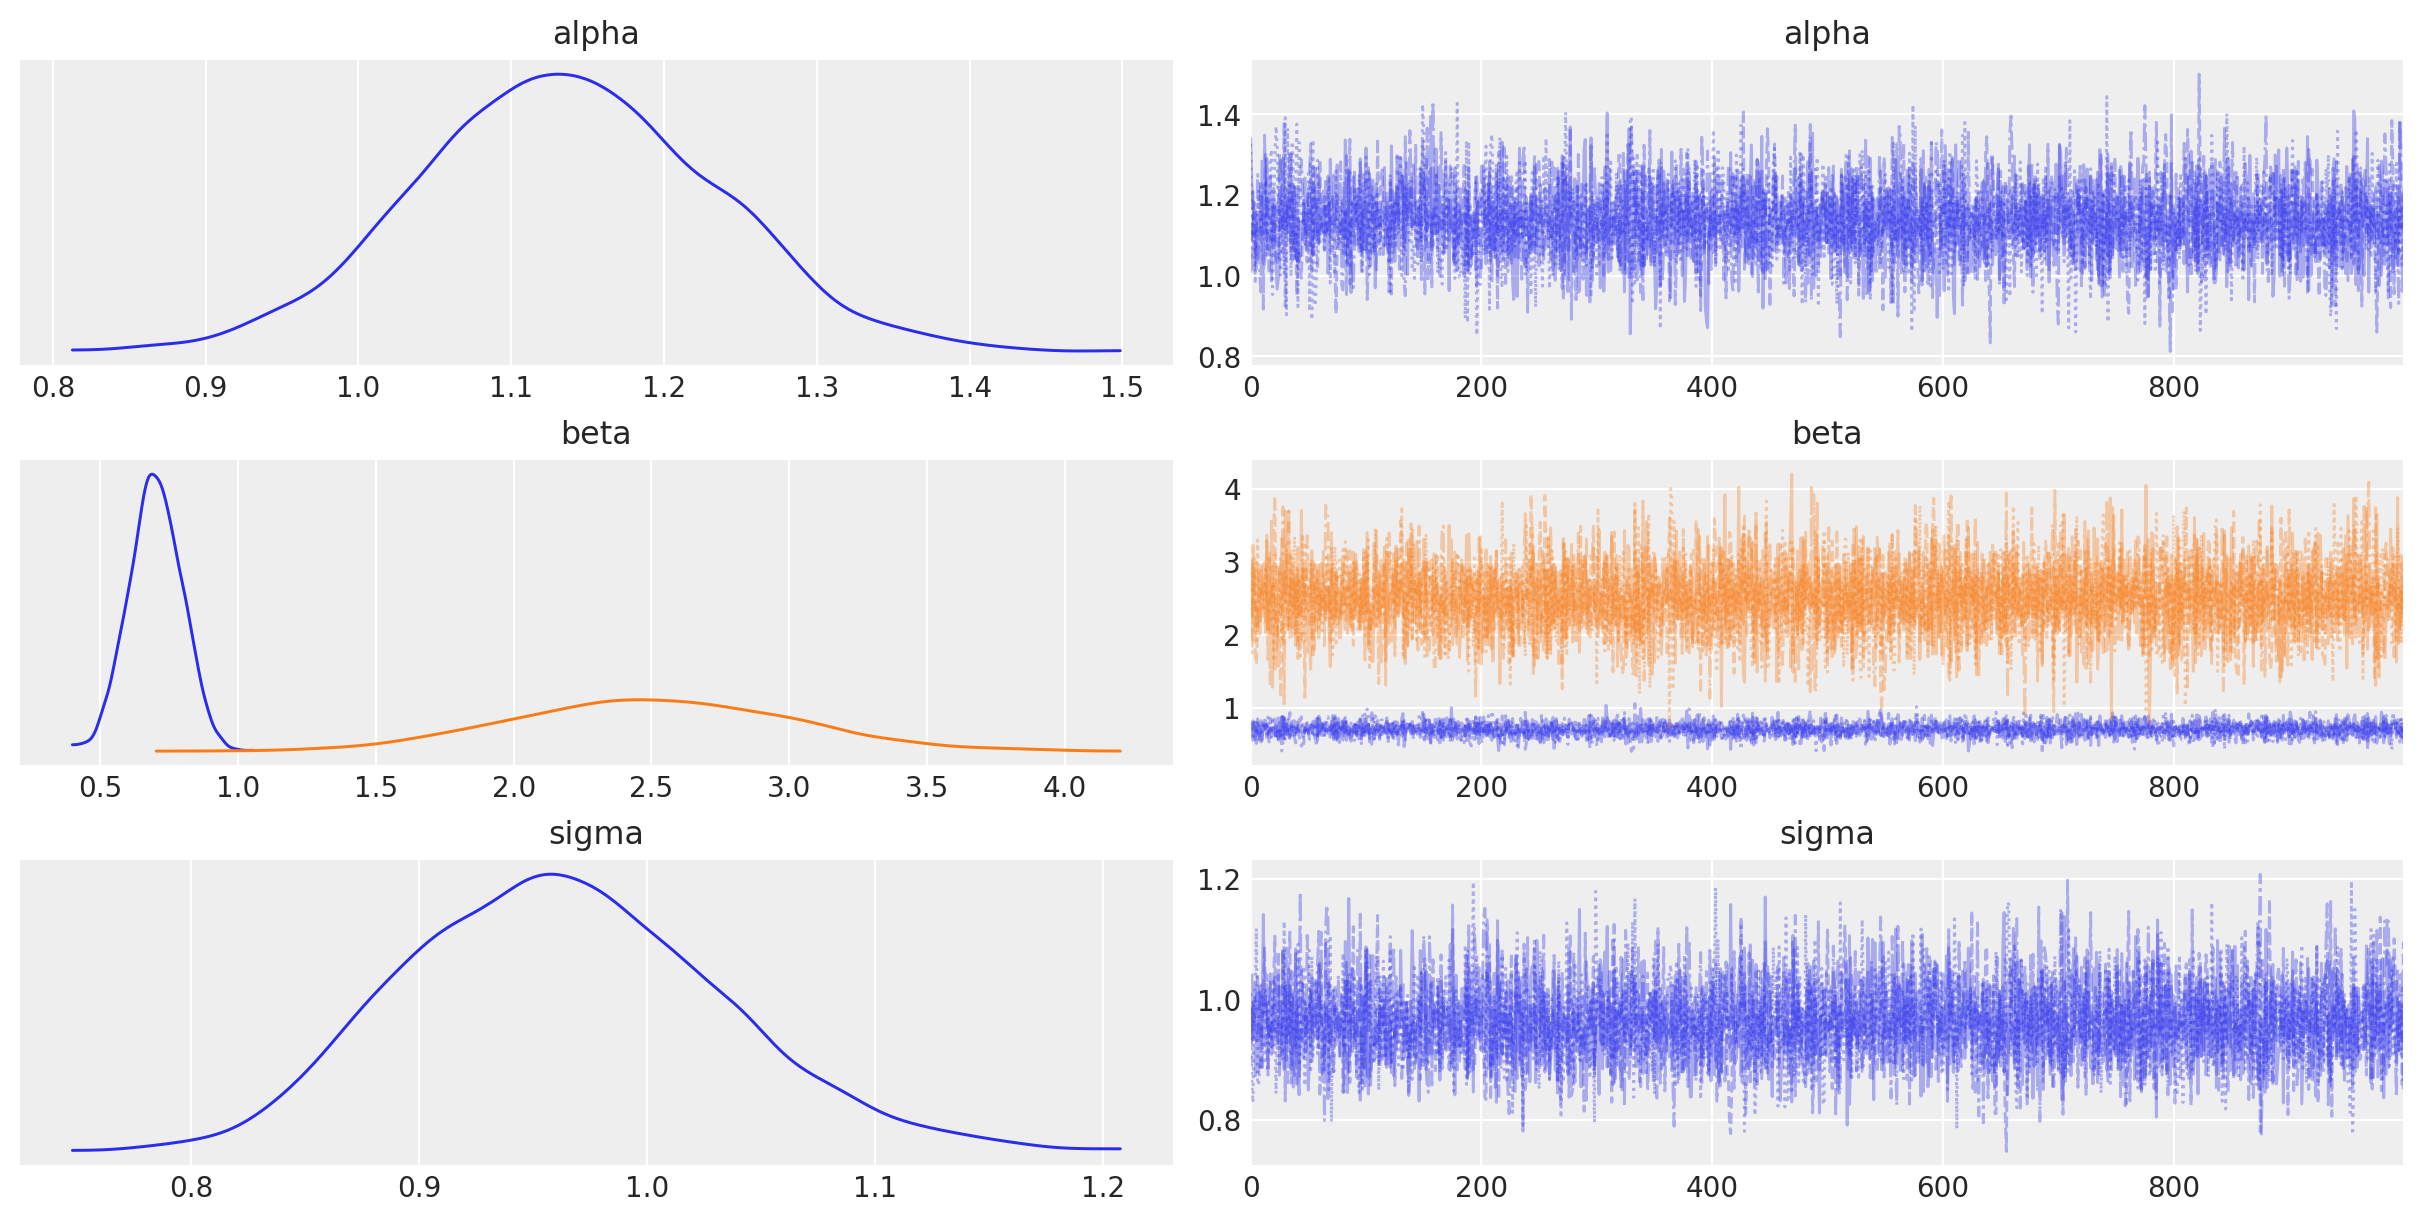

In [17]:
az.plot_trace(idata, combined=True);


In [18]:
az.summary(idata, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.14,0.10,0.95,1.31,0.00,0.00,5533.76,3277.23,1.0
beta[0],0.70,0.10,0.51,0.87,0.00,0.00,6815.43,3484.03,1.0
beta[1],2.50,0.51,1.60,3.50,0.01,0.01,6152.89,3190.98,1.0
sigma,0.96,0.07,0.84,1.09,0.00,0.00,5532.41,3383.81,1.0
